In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv.imread(r"D:\Desktop\shape detection\Shape-Detection\test.png")

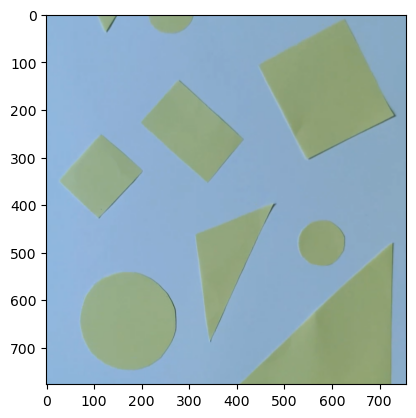

In [3]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
# hsv(86,30,62)

In [4]:
def find_shapes(img, arc_len_threshold):

    # selecting yellow-only pixels
    imgHSV = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    thresholded = cv.inRange(imgHSV, (20, 20, 20), (60, 255, 255))

    contours, _ = cv.findContours(thresholded, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        arc_len = cv.arcLength(contour, True)
        if arc_len > 200:
                approx = cv.approxPolyDP(
                        contour, 0.01 * cv.arcLength(contour, True), True)

                # finding center of a shape (to place a label)
                M = cv.moments(approx)
                if M['m00'] != 0.0:
                        x = int(M['m10']/M['m00'])
                        y = int(M['m01']/M['m00'])

                # classifying a shape
                if len(approx) == 3:
                        label = 'Triangle'
                        color = (255, 0, 0)
                elif len(approx) == 4:
                        label = 'Rectangle'
                        color = (0, 255, 0)
                else:
                        label ='Circle'
                        color = (0, 0, 255)

                cv.drawContours(img, [approx], 0, color, 3)
                cv.putText(img, label, (x, y),
                        cv.FONT_HERSHEY_COMPLEX, 0.6, color, 2)

    return img

In [5]:
cv.imshow('shapes', find_shapes(img, 200))
cv.waitKey(0)
cv.destroyAllWindows()
